# 一、实验准备

## 1、背景介绍
对数据科学家来说，预测证券市场走势是一项非常有诱惑力的工作，当然，他们这样做的目的很大程度上并不是为了获取物质回报，而是为了挑战自己。证券市场起起伏伏、变幻莫测，试想一下，如果在这个市场里存在一些我们或者我们的模型可以学习到的既定模式，让我们可以打败那些商科毕业的操盘手，将是多么美妙。

## 2、实验目的
构建更为合理的预测模型，为实际背景下的决策提供指导意义。

## 3、实验建议
（1）掌握数据描述，
（2）对数据进行简单分析和预处理
（3）机器学习模型（尤其是预测相关的模型）构建
（4）参数的简单调整
（5）以及模型评价，
（5）数据可视化等能力；

# 二、实验步骤

## 1、数据获取
 Tushare是一个免费、开源的python财经数据接口包。主要实现对股票等金融数据从数据采集、清洗加工 到 数据存储的过程，能够为金融分析人员提供快速、整洁、和多样的便于分析的数据，为他们在数据获取方面极大地减轻工作量，使他们更加专注于策略和模型的研究与实现上。考虑到Python pandas包在金融量化分析中体现出的优势，Tushare返回的绝大部分的数据格式都是pandas DataFrame类型，非常便于用pandas/NumPy/Matplotlib进行数据分析和可视化。

我们将使用以下代码提取上证指数：

In [1]:
#!pip install tushare
#注意安装之后需要重启kernel，即点一下上方的循环按钮
import pandas as pd
import datetime
import tushare as ts
from pandas import Series, DataFrame

In [2]:
start = datetime.datetime(2010, 1, 1)#起始时间
end = datetime.datetime(2020, 9, 23)#截止时间
df_maotai = ts.get_hist_data('600519',start=str(start),end=str(end))

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [3]:
df_maotai.head(10)
df_maotai.shape
df_maotai.tail()


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2018-05-08,698.03,712.13,708.90,698.03,62497.83,10.73,1.54,681.516,681.516,681.516,58410.15,58410.15,58410.15,0.50
2018-05-07,659.95,701.88,697.88,657.77,85591.43,35.01,5.28,674.670,674.670,674.670,57388.23,57388.23,57388.23,0.68
2018-05-04,670.98,674.83,662.95,660.57,37375.84,-7.93,-1.18,666.933,666.933,666.933,47987.16,47987.16,47987.16,0.30
2018-05-03,666.00,673.68,670.84,658.00,36326.53,3.01,0.45,668.925,668.925,668.925,53292.82,53292.82,53292.82,0.29
2018-05-02,660.00,668.99,667.01,645.06,70259.11,4.48,0.68,667.010,667.010,667.010,70259.11,70259.11,70259.11,0.56


In [4]:
start = datetime.datetime(2010, 1, 1)#起始时间
end = datetime.datetime(2020, 9, 23)#截止时间
df = ts.get_hist_data('sh',start=str(start),end=str(end))

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [5]:
df.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2020-09-23,3278.84,3289.76,3279.71,3264.89,1691780.62,5.41,0.17,3295.896,3283.306,3320.103,2117778.02,2205112.52,2452866.16
2020-09-22,3290.67,3320.23,3274.30,3265.70,2140150.75,-42.64,-1.29,3296.738,3280.798,3322.605,2180308.62,2387444.21,2515502.64
2020-09-21,3348.90,3350.59,3316.94,3313.07,2165031.00,-21.15,-0.63,3301.014,3285.010,3327.569,2147647.27,2444495.41,2547051.82
2020-09-18,3270.91,3338.32,3338.09,3268.53,2562608.00,67.65,2.07,3293.388,3282.575,3331.004,2142489.32,2488608.89,2571914.19
2020-09-17,3277.32,3290.41,3270.44,3248.50,2029319.75,-13.48,-0.41,3277.840,3284.303,3333.133,2073365.37,2453984.64,2587527.97


In [6]:
df.shape

(588, 13)

数据框中指标包括：

date：日期

open：开盘价

high：最高价

close：收盘价

low：最低价

volume：成交量

price_change：价格变动

p_change：涨跌幅

ma5：5日均价

ma10：10日均价

ma20:20日均价

v_ma5:5日均量

v_ma10:10日均量

v_ma20:20日均量

turnover:换手率[注：指数无此项]


对于单只股票，我们可以先进行一些简单分析，例如移动平均值

滚动平均 / 移动平均（MA）通过不断更新平均价格来平滑价格数据，有助于降低价格表中的“噪音”。此外，该移动平均线可能充当“阻力”，代表着股票的下跌和上升趋势，你可以从中预期它的未来趋势，不太可能偏离阻力点。

## 2、简单分析
对于单只股票，我们可以先进行一些简单分析，例如移动平均值

滚动平均 / 移动平均（MA）通过不断更新平均价格来平滑价格数据，有助于降低价格表中的“噪音”。此外，该移动平均线可能充当“阻力”，代表着股票的下跌和上升趋势，你可以从中预期它的未来趋势，不太可能偏离阻力点。

In [7]:
close_px = df['close']
mavg10 = close_px.rolling(window=10).mean()
mavg30 = close_px.rolling(window=30).mean()


这将计算收盘价100天的移动平均值，并取每个滑窗的移动平均值。正如你所看到的，移动平均线在滑窗上稳步上升，并不遵循股票价格曲线的锯齿线。为了更好地理解，让我们用 Matplotlib 来绘制它。我们将用移动平均线来绘制股票价格表。

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


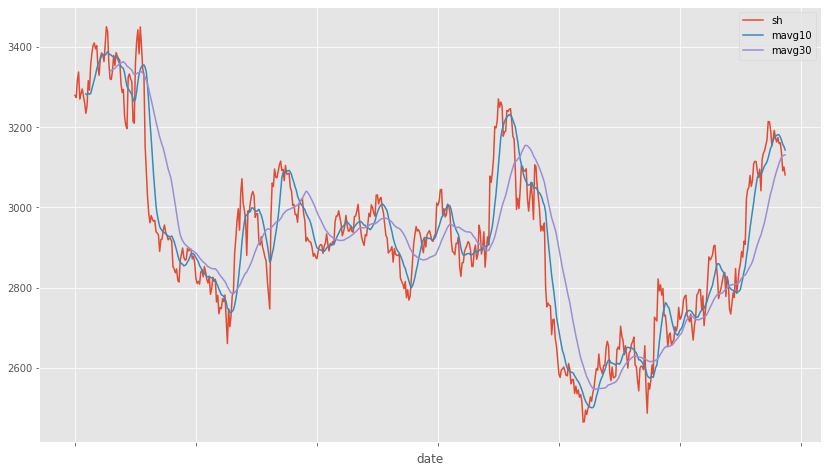

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(14, 8))
mpl.__version__
# Adjusting the style of matplotlib
style.use('ggplot')
close_px.plot(label='sh')
mavg10.plot(label='mavg10')
mavg30.plot(label='mavg30')
plt.legend()

In [9]:
close_px

date
2020-09-23    3279.71
2020-09-22    3274.30
2020-09-21    3316.94
2020-09-18    3338.09
2020-09-17    3270.44
2020-09-16    3283.92
2020-09-15    3295.68
2020-09-14    3278.81
2020-09-11    3260.35
2020-09-10    3234.82
2020-09-09    3254.63
2020-09-08    3316.42
2020-09-07    3292.59
2020-09-04    3355.37
2020-09-03    3384.98
2020-09-02    3404.80
2020-09-01    3410.61
2020-08-31    3395.68
2020-08-28    3403.81
2020-08-27    3350.11
2020-08-26    3329.74
2020-08-25    3373.58
2020-08-24    3385.64
2020-08-21    3380.68
2020-08-20    3363.90
2020-08-19    3408.13
2020-08-18    3451.09
2020-08-17    3438.80
2020-08-14    3360.10
2020-08-13    3320.73
               ...   
2018-06-12    3079.80
2018-06-11    3052.78
2018-06-08    3067.15
2018-06-07    3109.50
2018-06-06    3115.18
2018-06-05    3114.21
2018-06-04    3091.19
2018-06-01    3075.14
2018-05-31    3095.47
2018-05-30    3041.44
2018-05-29    3120.46
2018-05-28    3135.08
2018-05-25    3141.30
2018-05-24    3154.65
2018-

此外，收益率也是我们考虑一只股票的重要影响因素

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

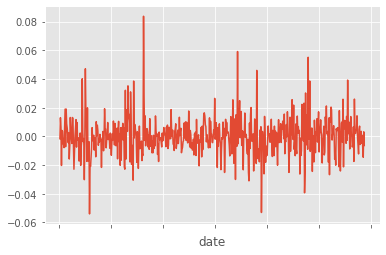

In [10]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

从逻辑上讲，我们理想的股票收益应该尽可能高且稳定。如果你是风险规避者，你可能希望避开这种股票，因为你看到 2013 年下跌了 10%。这个决定很大程度上取决于你对股票的总体看法和对其他竞争对手股票的分析。

当然我们也可以一口气调用多只股票,如上证指数、深证指数以及沪深300指数，研究这些科技公司股价之间的关系。

以他们的调整后收盘价为例

In [11]:
df_1 = ts.get_hist_data('sh',start=str(start),end=str(end))['close']
df_2 = ts.get_hist_data('sz',start=str(start),end=str(end))['close']
df_3 = ts.get_hist_data('hs300',start=str(start),end=str(end))['close']
dfcomp = pd.DataFrame()
dfcomp['sh'] = df_1
dfcomp['sz'] = df_2
dfcomp['hs300'] = df_3

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [12]:
dfcomp.head()

,sh,sz,hs300
date,,,
2020-09-23,3279.71,13110.07,4652.33
2020-09-22,3274.30,13023.43,4635.76
2020-09-21,3316.94,13149.50,4691.43
2020-09-18,3338.09,13245.09,4737.09
2020-09-17,3270.44,13015.19,4632.71


在得到多只股票的股价后，我们可以考虑研究他们之间的相关性关系

In [13]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()
corr

,sh,sz,hs300
sh,1.000000,0.947800,0.980642
sz,0.947800,1.000000,0.948882
hs300,0.980642,0.948882,1.000000


让我们绘制散点图来观察 Apple 和 GE 的收益分布。

Text(0, 0.5, 'Returns sz')

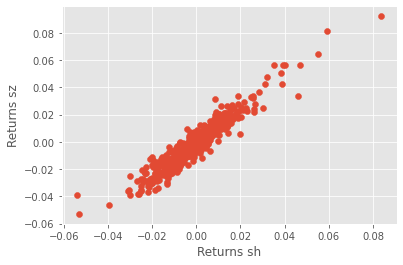

In [14]:
plt.scatter(retscomp.sh, retscomp.sz)
mpl.rc('figure', figsize=(8, 8))
plt.xlabel('Returns sh')
plt.ylabel('Returns sz')

我们可以看到，上证指数的收益和沪深指数的收益之间存在着微弱的正相关关系。似乎在大多数情况下， 上证指数的回报率越高，沪深指数的回报率也就越高。

让我们通过绘制散点矩阵进一步改进我们的分析，以可视化竞争股票之间可能的相关性。在对角点，我们将运行核密度估计(Kernel Density Estimate,KDE)。KDE 是一个基本的数据平滑问题，它基于有限的数据样本对总体进行推断。它有助于生成对总体分布的估计。

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:314: MatplotlibDeprecationWarning: 
The colNu

array([[<AxesSubplot:xlabel='sh', ylabel='sh'>,
        <AxesSubplot:xlabel='sz', ylabel='sh'>,
        <AxesSubplot:xlabel='hs300', ylabel='sh'>],
       [<AxesSubplot:xlabel='sh', ylabel='sz'>,
        <AxesSubplot:xlabel='sz', ylabel='sz'>,
        <AxesSubplot:xlabel='hs300', ylabel='sz'>],
       [<AxesSubplot:xlabel='sh', ylabel='hs300'>,
        <AxesSubplot:xlabel='sz', ylabel='hs300'>,
        <AxesSubplot:xlabel='hs300', ylabel='hs300'>]], dtype=object)

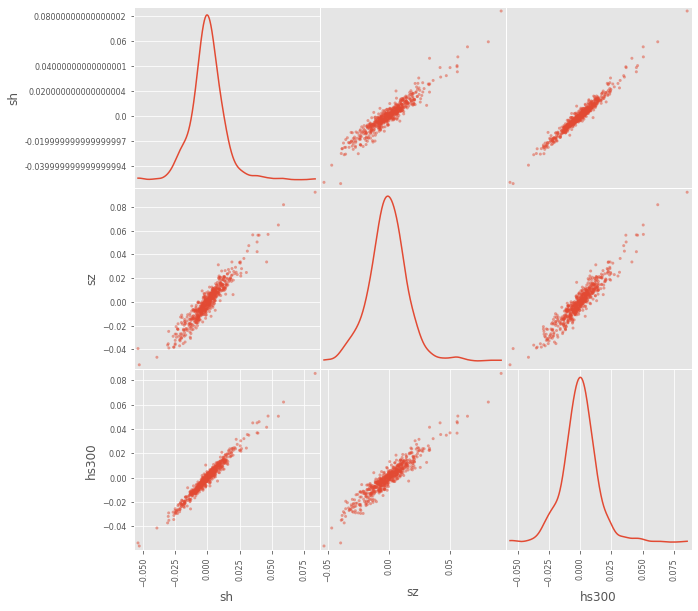

In [15]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10))

从这里我们可以得到大多数指数之间的分布近似正相关。

为了证明正相关关系，我们将使用热图来可视化竞争股票之间的相关程度。注意颜色越浅代表这两只指数的相关性越强。

([<matplotlib.axis.YTick at 0x7f4edaf98550>,
 [Text(0, 0, 'sh'), Text(0, 1, 'sz'), Text(0, 2, 'hs300')])

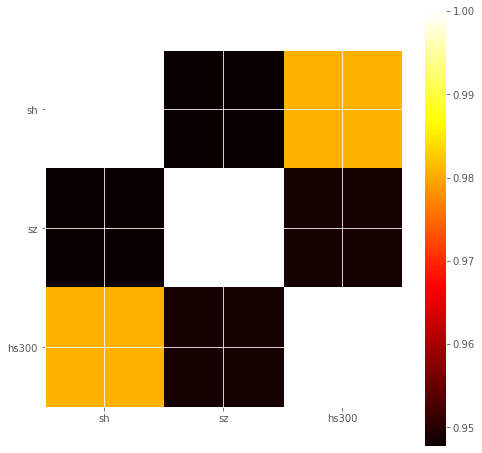

In [16]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

## 3.构建预测模型


### 3.1 特征工程

我们将使用一些机器学习模型来预测股票，但首先我们需要设计一些特征：高-低百分比和百分比变化,股价的滞后项。还是以上证指数为例

In [17]:
dfreg = df.loc[:,['close','volume']].copy()
dfreg['HL_PCT'] = (df['high'] - df['low']) / df['close'] * 100.0
dfreg['PCT_change'] = (df['close'] - df['open']) / df['open'] * 100.0

In [18]:
dfreg['close -1'] = df['close'].shift(1)
dfreg['close -2'] = df['close'].shift(2)
dfreg['close -3'] = df['close'].shift(3)

In [19]:
dfreg.head(10)

,close,volume,HL_PCT,PCT_change,close -1,close -2,close -3
date,,,,,,,
2020-09-23,3279.71,1691780.62,0.758299,0.026534,NaN,NaN,NaN
2020-09-22,3274.30,2140150.75,1.665394,-0.497467,3279.71,NaN,NaN
2020-09-21,3316.94,2165031.00,1.131163,-0.954343,3274.30,3279.71,NaN
2020-09-18,3338.09,2562608.00,2.090717,2.053863,3316.94,3274.30,3279.71
2020-09-17,3270.44,2029319.75,1.281479,-0.209928,3338.09,3316.94,3274.30
2020-09-16,3283.92,2004433.62,0.955565,-0.280884,3270.44,3338.09,3316.94
2020-09-15,3295.68,1976844.00,1.029833,0.566044,3283.92,3270.44,3338.09
2020-09-14,3278.81,2139241.25,0.682565,0.088219,3295.68,3283.92,3270.44
2020-09-11,3260.35,2216988.25,1.286978,1.071679,3278.81,3295.68,3283.92


删除掉对应缺失值

In [20]:
dfreg = dfreg.iloc[3:,:].copy()

In [21]:
dfreg.shape

(585, 7)

In [22]:
dfreg.head()

,close,volume,HL_PCT,PCT_change,close -1,close -2,close -3
date,,,,,,,
2020-09-18,3338.09,2562608.00,2.090717,2.053863,3316.94,3274.30,3279.71
2020-09-17,3270.44,2029319.75,1.281479,-0.209928,3338.09,3316.94,3274.30
2020-09-16,3283.92,2004433.62,0.955565,-0.280884,3270.44,3338.09,3316.94
2020-09-15,3295.68,1976844.00,1.029833,0.566044,3283.92,3270.44,3338.09
2020-09-14,3278.81,2139241.25,0.682565,0.088219,3295.68,3283.92,3270.44


划分数据集,取前425期作为训练集，后8期作为测试集

In [23]:
y = dfreg['close']
X = dfreg.loc[:,['volume','HL_PCT','PCT_change','close -1','close -2','close -3']]

In [24]:
len(y)

585

In [25]:
from sklearn.model_selection import train_test_split

训练集，测试集拆分：X_train，y_train：得到的训练数据。X_test， y_test：得到的测试数据。random_state：随机数

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
X_train

,volume,HL_PCT,PCT_change,close -1,close -2,close -3
date,,,,,,
2019-05-23,1973403.12,1.338466,-0.983047,2852.99,2892.38,2909.91
2019-10-23,1238128.75,0.770664,-0.384359,2940.92,2954.93,2980.05
2020-02-19,3151411.50,0.888956,-0.138277,3030.15,3039.67,3031.23
2018-11-02,2250269.25,1.778829,1.027838,2665.43,2659.36,2641.34
2018-11-27,1236584.38,1.024205,-0.431196,2601.74,2567.44,2588.19
2019-12-03,1237787.38,0.954692,0.516398,2878.12,2899.47,2912.01
2020-03-16,3518786.75,4.064533,-3.729334,2779.64,2728.76,2702.13
2019-08-28,1830979.00,0.636888,-0.271227,2890.92,2886.24,2924.11
2019-01-15,1602655.25,1.520032,1.299377,2570.42,2559.64,2596.01


### 3.2神经网络模型

### 3.2.1 模型简介
多层神经网络是一个在输入和输出层之间具有一层或多层的神经元前馈网络。用于多层神经网络的BP算法包含正向传播和反向传播过程。在正向传播过程中，样本输入值从输入层经隐单元层传递到输出层，然后进行误差反向传播过程，即将误差逐层传递到输入层，通过改变各神经元间的权值使得样本点的实际输出值和期望输出值间误差渐渐减少神经网络是一种非线性学习算法

### 3.2.2 建模步骤

### 3.3 随机森林

随机森林是一种集成算法（Ensemble Learning），它属于Bagging类型，通过组合多个弱分类器，最终结果通过投票或取均值，使得整体模型的结果具有较高的精确度和泛化性能。其可以取得不错成绩，主要归功于“随机”和“森林”，一个使它具有抗过拟合能力，一个使它更加精准。

### Bagging

Bagging也叫自举汇聚法（bootstrap aggregating），是一种在原始数据集上通过有放回抽样重新选出k个新数据集来训练分类器的集成技术。它使用训练出来的分类器的集合来对新样本进行分类，然后用多数投票或者对输出求均值的方法统计所有分类器的分类结果，结果最高的类别即为最终标签。此类算法可以有效降低bias，并能够降低variance。

【自助法】它通过自助法（bootstrap）重采样技术，从训练集里面采集固定个数的样本，但是每采集一个样本后，都将样本放回。也就是说，之前采集到的样本在放回后有可能继续被采集到。  
【OOB】在Bagging的每轮随机采样中，训练集中大约有36.8%的数据没有被采样集采集中。对于这部分没采集到的数据，我们常常称之为袋外数据(Out Of Bag，简称OOB)。这些数据没有参与训练集模型的拟合，因此可以用来检测模型的泛化能力。  
【随机性】对于我们的Bagging算法，一般会对样本使用boostrap进行随机采集，每棵树采集相同的样本数量，一般小于原始样本量。这样得到的采样集每次的内容都不同，通过这样的自助法生成k个分类树组成随机森林，做到样本随机性。  
【输出】Bagging的集合策略也比较简单，对于分类问题，通常使用简单投票法，得到最多票数的类别或者类别之一为最终的模型输出。对于回归问题，通常使用简单平均法，对T个弱学习器得到的回归结果进行算术平均得到最终的模型输出。

随机森林(Random Forest，RF）是Bagging算法的一种，其实在介绍完Bagging算法之后，随机森林几乎是呼之欲出的，RF相对于Bagging只是对其中一些细节做了自己的规定和设计。

【弱分类器】首先，RF使用了CART决策树作为弱学习器。换句话说，其实我们只是将使用CART决策树作为弱学习器的Bagging方法称为随机森林。  
【随机性】同时，在生成每棵树的时候，每个树选取的特征都仅仅是随机选出的少数特征，一般默认取特征总数m的开方。而一般的CART树则是会选取全部的特征进行建模。因此，不但特征是随机的，也保证了特征随机性。  
【样本量】相对于一般的Bagging算法，RF会选择采集和训练集样本数N一样个数的样本。  
【特点】由于随机性，对于降低模型的方差很有作用，故随机森林一般不需要额外做剪枝，即可以取得较好的泛化能力和抗过拟合能力（Low Variance）。当然对于训练集的拟合程度就会差一些，也就是模型的偏倚会大一些（High Bias），仅仅是相对的。

### 3.3.2 建模

1、默认参数条件下建模

（1）建立模型

In [28]:
from sklearn.ensemble import RandomForestRegressor

reg_rf0 = RandomForestRegressor(random_state=10,n_estimators=100, min_samples_leaf=70)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


(2)拟合数据

In [29]:
reg_rf0.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=70, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

(3)预测

In [30]:
pred_test_rf0  = reg_rf0.predict(X_test)
pred_train_rf0  = reg_rf0.predict(X_train)
mse_test = ((((pred_test_rf0 - y_test)/y_test)**2).mean())**0.5
mse_train = ((((pred_train_rf0 - y_train)/y_train)**2).mean())**0.5

In [31]:
mse_test

0.03449098934347578

In [32]:
mse_test

0.03449098934347578

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


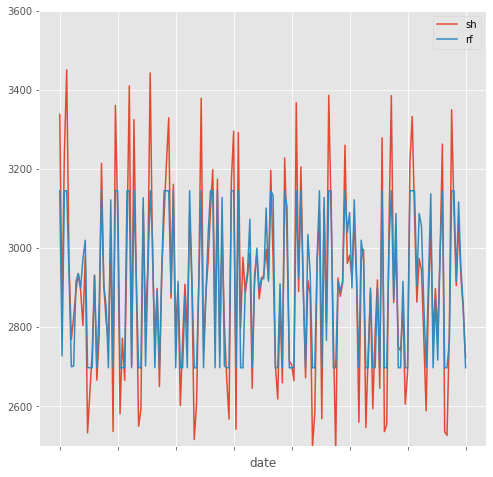

In [33]:
pred_test_rf0 = Series(pred_test_rf0, index = y_test.index)
y_test.plot(label='sh')
pred_test_rf0.plot(label = 'rf')
plt.ylim(2500, 3600)
plt.legend()

#### 可见参数调整后模型精度有相应的提升

### 3.4 SVM算法

#### 3.4.1 模型简介

支持向量的目标就是找到一个分割面能够将两类给区分开来，同时和两类中离分割面最近的那些样本点保持最大的距离。这里有两个间隔：函数间隔和几何间隔（具体课看统计学习方法这本书中的方程式进行理解）

#### 3.4.2 建模

默认参数下建立模型

1、建立模型

In [34]:
from sklearn.svm import SVR

reg_svm0 = SVR()

2、训练模型

In [35]:
reg_svm0.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

3、预测

In [36]:
pred_test_svm0 = reg_svm0.predict(X_test)
pred_train_svm0 = reg_svm0.predict(X_train)
mse_test = ((((pred_test_svm0 - y_test)/y_test)**2).mean())**0.5
mse_train = ((((pred_train_svm0 - y_train)/y_train)**2).mean())**0.5

In [37]:
mse_test

0.07989471789091473

svm肯定需要调参~，对结果影响也很大。

支持向量机重要参数

SVR参数解释   
（1）C: 目标函数的惩罚系数C，用来平衡分类间隔margin和错分样本的，default C = 1.0；  
（2）kernel：参数选择有RBF, Linear, Poly, Sigmoid, 默认的是”RBF”;   
（3）degree：if you choose ‘Poly’ in param 2, this is effective, degree决定了多项式的最高次幂；   
（4）gamma：核函数的系数(‘Poly’, ‘RBF’ and ‘Sigmoid’), 默认是gamma = 1 / n_features;   
（5）coef0：核函数中的独立项，’RBF’ and ‘Poly’有效；   
（6）shrinking：是否进行启发式； 
（7）tol（default = 1e - 3）: svm结束标准的精度;   
（8）cache_size: 制定训练所需要的内存（以MB为单位）；   
（9）class_weight: 每个类所占据的权重，不同的类设置不同的惩罚参数C, 缺省的话自适应；   
（10）verbose: 多线程相关参数 
（11）max_iter: 最大迭代次数，default = 1， if max_iter = -1, no limited;    
（12）decision_function_shape ： ‘ovo’ 一对一, ‘ovr’ 多对多 or None 无, default=None   
（13）random_state ：用于概率估计的数据重排时的伪随机数生成器的种子。   

本实验通过调整C和gamma来优化模型

In [38]:
from sklearn.model_selection import GridSearchCV 

# 交叉验证分类器   
def svm_cross_validation(X_train, y_train):        
    model = SVR(kernel='rbf')    
    param_grid = {'C': [1e-4,1e-3, 1e-2, 1e-1], 'gamma': [0.1,0.001, 0.0001]}    
    grid_search = GridSearchCV(model, param_grid, n_jobs = 8, verbose=1)    
    grid_search.fit(X_train, y_train)    
    best_parameters = grid_search.best_estimator_.get_params()    
    for para, val in list(best_parameters.items()):    
        print(para, val)    
    model = SVR(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'])    
    model.fit(X_train, y_train)    
    return model

In [39]:
svm_cross_validation(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
C 0.01
cache_size 200
coef0 0.0
degree 3
epsilon 0.1
gamma 0.0001
kernel rbf
max_iter -1
shrinking True
tol 0.001
verbose False


[Parallel(n_jobs=8)]: Done  36 out of  36 | elapsed:    0.2s finished


SVR(C=0.01, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

训练后可以得到所需结果，C = 0.1，gamma = 0.0001

In [40]:
reg_svm1 = SVR(kernel='rbf',C=0.1,gamma = 0.0001).fit(X_train,y_train)

In [41]:
pred_test_svm1 = reg_svm1.predict(X_test)
pred_train_svm1 = reg_svm1.predict(X_train)
mse_test = ((((pred_test_svm1 - y_test)/y_test)**2).mean())**0.5
mse_train = ((((pred_train_svm1 - y_train)/y_train)**2).mean())**0.5

In [42]:
mse_test

0.07990475296320622

### 3.5 GBDT 

#### 3.5.1 模型简介
GBDT也是集成学习Boosting家族的成员，但是却和传统的Adaboost有很大的不同。回顾下Adaboost，我们是利用前一轮迭代弱学习器的误差率来更新训练集的权重，这样一轮轮的迭代下去。GBDT也是迭代，使用了前向分布算法，但是弱学习器限定了只能使用CART回归树模型，同时迭代思路和Adaboost也有所不同。

#### 3.5.2 建立模型
在sacikit-learn中，GradientBoostingClassifier为GBDT的分类类， 而GradientBoostingRegressor为GBDT的回归类。两者的参数类型完全相同，当然有些参数比如损失函数loss的可选择项并不相同。这些参数中，类似于Adaboost，我们把重要参数分为两类，第一类是Boosting框架的重要参数，第二类是弱学习器即CART回归树的重要参数。

GBDT类库boosting框架参数

1) n_estimators: 也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数。一般来说n_estimators太小，容易欠拟合，n_estimators太大，又容易过拟合，一般选择一个适中的数值。默认是100。在实际调参的过程中，我们常常将n_estimators和下面介绍的参数learning_rate一起考虑。

2) learning_rate: 即每个弱学习器的权重缩减系数ν，也称作步长

3) subsample: 子采样，取值为(0,1]。注意这里的子采样和随机森林不一样，随机森林使用的是放回抽样，而这里是不放回抽样。如果取值为1，则全部样本都使用，等于没有使用子采样。如果取值小于1，则只有一部分样本会去做GBDT的决策树拟合。选择小于1的比例可以减少方差，即防止过拟合，但是会增加样本拟合的偏差，因此取值不能太低。推荐在[0.5, 0.8]之间，默认是1.0，即不使用子采样。

4) loss: 即我们GBDT算法中的损失函数。分类模型和回归模型的损失函数是不一样的。 对于分类模型，有对数似然损失函数"deviance"和指数损失函数"exponential"两者输入选择。默认是对数似然损失函数"deviance"。在原理篇中对这些分类损失函数有详细的介绍。一般来说，推荐使用默认的"deviance"。它对二元分离和多元分类各自都有比较好的优化。而指数损失函数等于把我们带到了Adaboost算法。

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.grid_search import GridSearchCV

reg_gbdt = GradientBoostingRegressor(random_state=10).fit(X_train,y_train)
pred_test_gbdt = reg_gbdt.predict(X_test)
pred_train_gbdt = reg_gbdt.predict(X_train)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [44]:
mse_test = ((((pred_test_gbdt - y_test)/y_test)**2).mean())**0.5
mse_train = ((((pred_train_gbdt - y_train)/y_train)**2).mean())**0.5

In [45]:
mse_test

0.015073226458048435

我们下面看看怎么通过调参提高模型的泛化能力。

首先我们从步长(learning rate)和迭代次数(n_estimators)入手。一般来说,开始选择一个较小的步长来网格搜索最好的迭代次数。这里，我们将步长初始值设置为0.1。对于迭代次数进行网格搜索如下：

In [46]:
param_test1 = {'n_estimators':list(range(20,81,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=300,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1,iid=False,cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: -0.01593, std: 0.01825, params: {'n_estimators': 20},
  mean: -0.01755, std: 0.01929, params: {'n_estimators': 30},
  mean: -0.01636, std: 0.01846, params: {'n_estimators': 40},
  mean: -0.01735, std: 0.01921, params: {'n_estimators': 50},
  mean: -0.01718, std: 0.01909, params: {'n_estimators': 60},
  mean: -0.01705, std: 0.01874, params: {'n_estimators': 70},
  mean: -0.01641, std: 0.01847, params: {'n_estimators': 80}],
 {'n_estimators': 20},
 -0.015931792160813706)

可见最好的迭代次数是50。找到了一个合适的迭代次数，现在我们开始对决策树进行调参。首先我们对决策树最大深度max_depth和内部节点再划分所需最小样本数min_samples_split进行网格搜索。

In [47]:
param_test2 = {'max_depth':list(range(3,14,2)), 'min_samples_split':list(range(80,150,20))}
gsearch2 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50, min_samples_leaf=20, 
      max_features='sqrt', subsample=0.8, random_state=10), 
   param_grid = param_test2,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.94238, std: 0.01492, params: {'max_depth': 3, 'min_samples_split': 80},
  mean: 0.93839, std: 0.01807, params: {'max_depth': 3, 'min_samples_split': 100},
  mean: 0.93772, std: 0.01882, params: {'max_depth': 3, 'min_samples_split': 120},
  mean: 0.93859, std: 0.01893, params: {'max_depth': 3, 'min_samples_split': 140},
  mean: 0.94461, std: 0.01284, params: {'max_depth': 5, 'min_samples_split': 80},
  mean: 0.94253, std: 0.01665, params: {'max_depth': 5, 'min_samples_split': 100},
  mean: 0.93868, std: 0.01772, params: {'max_depth': 5, 'min_samples_split': 120},
  mean: 0.93917, std: 0.02029, params: {'max_depth': 5, 'min_samples_split': 140},
  mean: 0.94435, std: 0.01379, params: {'max_depth': 7, 'min_samples_split': 80},
  mean: 0.94211, std: 0.01695, params: {'max_depth': 7, 'min_samples_split': 100},
  mean: 0.93854, std: 0.01779, params: {'max_depth': 7, 'min_samples_split': 120},
  mean: 0.93919, std: 0.02032, params: {'max_depth': 7, 'min_samples_split': 140},
  mean:

可见最好的最大树深度是3，内部节点再划分所需最小样本数是80。由于决策树深度5是一个比较合理的值，我们把它定下来，对于内部节点再划分所需最小样本数min_samples_split，我们暂时不能一起定下来，因为这个还和决策树其他的参数存在关联。下面我们再对内部节点再划分所需最小样本数min_samples_split和叶子节点最少样本数min_samples_leaf一起调参。

In [48]:
param_test3 = {'min_samples_split':list(range(80,150,20)), 'min_samples_leaf':list(range(10,60,10))}
gsearch3 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50,max_depth=3,
                                     max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.94479, std: 0.01640, params: {'min_samples_leaf': 10, 'min_samples_split': 80},
  mean: 0.94197, std: 0.01962, params: {'min_samples_leaf': 10, 'min_samples_split': 100},
  mean: 0.93955, std: 0.02227, params: {'min_samples_leaf': 10, 'min_samples_split': 120},
  mean: 0.94039, std: 0.02132, params: {'min_samples_leaf': 10, 'min_samples_split': 140},
  mean: 0.94238, std: 0.01492, params: {'min_samples_leaf': 20, 'min_samples_split': 80},
  mean: 0.93839, std: 0.01807, params: {'min_samples_leaf': 20, 'min_samples_split': 100},
  mean: 0.93772, std: 0.01882, params: {'min_samples_leaf': 20, 'min_samples_split': 120},
  mean: 0.93859, std: 0.01893, params: {'min_samples_leaf': 20, 'min_samples_split': 140},
  mean: 0.93550, std: 0.01429, params: {'min_samples_leaf': 30, 'min_samples_split': 80},
  mean: 0.93319, std: 0.01769, params: {'min_samples_leaf': 30, 'min_samples_split': 100},
  mean: 0.93217, std: 0.01774, params: {'min_samples_leaf': 30, 'min_samples_split': 120},
  

现在我们再对最大特征数max_features进行网格搜索。

In [49]:
param_test4 = {'max_features':list(range(2,6,1))}
gsearch4 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50,max_depth=3, min_samples_leaf = 10, 
               min_samples_split = 80, subsample=0.8, random_state=10), 
                       param_grid = param_test4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.94479, std: 0.01640, params: {'max_features': 2},
  mean: 0.95217, std: 0.01756, params: {'max_features': 3},
  mean: 0.95742, std: 0.01331, params: {'max_features': 4},
  mean: 0.95784, std: 0.01435, params: {'max_features': 5}],
 {'max_features': 5},
 0.9578389422318712)

用我们搜索到的最佳参数，我们再看看最终的模型拟合：

In [50]:
reg_gbdt1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=50,max_depth=3, min_samples_leaf = 10, 
               min_samples_split = 80, max_features=5,subsample=0.8, random_state=10).fit(X_train,y_train)

pred_test_gbdt1 = reg_gbdt1.predict(X_test)
pred_train_gbdt1 = reg_gbdt1.predict(X_train)

In [51]:
mse_test = ((((pred_test_gbdt1 - y_test)/y_test)**2).mean())**0.5
mse_train = ((((pred_train_gbdt1 - y_train)/y_train)**2).mean())**0.5

In [52]:
print(mse_train)
print(mse_test)

0.011029390304071962
0.014728299549804497


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:402: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


NameError: name 'pred_test_rf2' is not defined

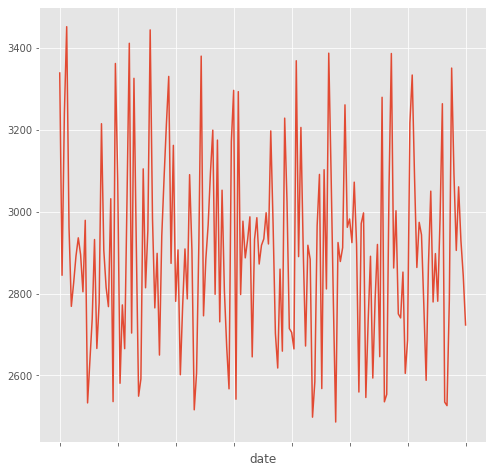

In [53]:
pred_test_gbdt1 = Series(pred_test_gbdt1, index = y_test.index)
pred_test_gbdt = Series(pred_test_gbdt, index = y_test.index)
y_test.plot(label='sh')
pred_test_rf2.plot(label='rf_adjust')
pred_test_gbdt1.plot(label = 'gbdt_adjust')
pred_test_gbdt.plot(label = 'gbdt_initial')
plt.legend()

#### 从而我们可以看出，GBDT与RF算法在预测股价上具有较大的优势。